### 3 types of envs: 
#### 1. 11*11_empty 
![11*11_level1.png](/home/siyao/project/rlPractice/MiniGrid/level/11*11_level1.png)
#### 2. 6*12_empty
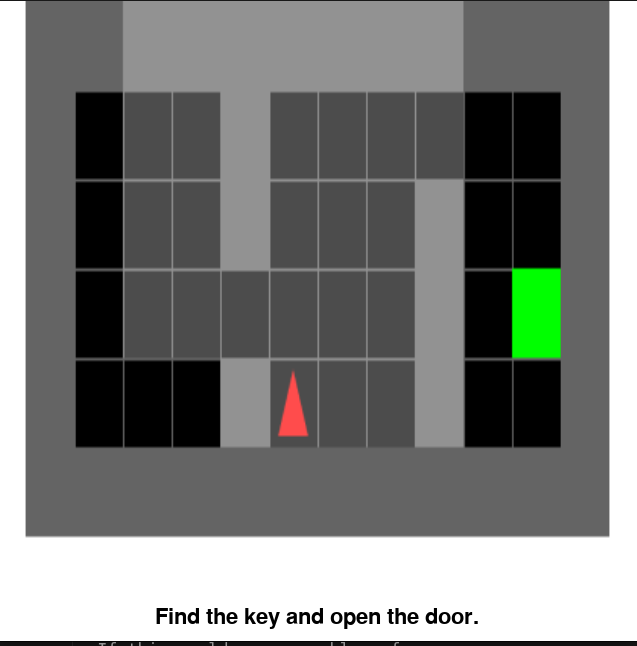
#### 3. 21*21_empty
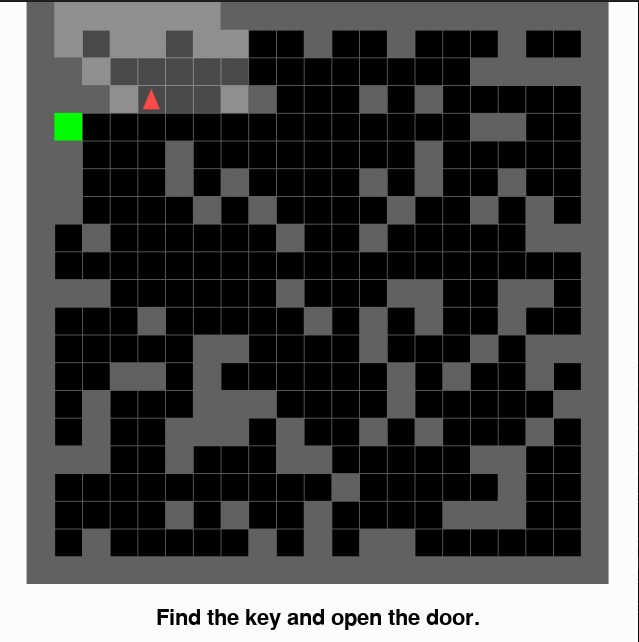



In [77]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [78]:
api = wandb.Api()


In [84]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "u036g7f2"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [100]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
# df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_att.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_att.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度


     loss_obs  epoch
0    0.034483      0
1    0.030231      0
2    0.030147      0
3    0.025792      0
4    0.023073      0
..        ...    ...
495  0.000047      4
496  0.000075      4
497  0.000049      4
498  0.000049      4
499  0.000040      4

[500 rows x 2 columns]
         loss
0    0.000010
1    0.000029
2    0.000043
3    0.000020
4    0.000017
..        ...
495  0.000023
496  0.000013
497  0.000014
498  0.000012
499  0.000028

[500 rows x 1 columns]
         loss
0    0.000014
1    0.000029
2    0.000032
3    0.000026
4    0.000016
..        ...
495  0.000045
496  0.000033
497  0.000020
498  0.000021
499  0.000047

[500 rows x 1 columns]


### 1. Attention-Based World model comparison

In [109]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="AttentionBased WM",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.005]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()




### 2. MLP-Based world model comparison

In [106]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "imyrq7tt"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [112]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_mlp.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_mlp.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度


     loss_obs  epoch
0    0.127162      0
1    0.164274      0
2    0.083896      0
3    0.080084      0
4    0.070936      0
..        ...    ...
495  0.000565      8
496  0.000616      8
497  0.000629      8
498  0.000427      8
499  0.001372      8

[500 rows x 2 columns]
         loss
0    0.000236
1    0.000222
2    0.000120
3    0.000244
4    0.000222
..        ...
495  0.000158
496  0.000487
497  0.000103
498  0.000162
499  0.000171

[500 rows x 1 columns]
         loss
0    0.000667
1    0.001209
2    0.000237
3    0.000202
4    0.000137
..        ...
495  0.000859
496  0.000801
497  0.001562
498  0.000939
499  0.000146

[500 rows x 1 columns]


In [115]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="MLPBased WM",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.01]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()

### 3. Embedding-Based world model comparison

In [ ]:
# 替换为你的实体和项目名称
wandb.init(project="Local_Attention_Training")
entity = "svea41"  # 实体名称
project = "Local_Attention_Training"  # 项目名称
run_id = "obpp0fdm"
run = api.run(f"{entity}/{project}/{run_id}")
# history = run.history(keys=["loss_obs", "avg_val_loss_wm", "epoch"], pandas=True)
history = []
for row in run.scan_history():
    if "epoch" in row and "loss_obs" in row:
        history.append({"epoch": row["epoch"], "loss_obs": row["loss_obs"]})

In [ ]:
# 将数据转换为 Pandas DataFrame
# 1. 11*11 loss
import pandas as pd
df = pd.DataFrame(history)
df['loss_smooth'] = df['loss_obs'].ewm(span=10).mean()  # span 控制平滑程度
df['loss_smooth'] = df["loss_obs"].rolling(window=10).mean()  # 设置窗口大小，比如10

# 查看数据
print(df[["loss_obs", "epoch"]].head(500))
# Count the total number of unique training epochs

# 2. 6*12 loss
df2 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_6*12_mlp.csv')
print(df2.head(500))
df2['loss_smooth'] = df2['loss'].ewm(span=10).mean()  # span 控制平滑程度

# 3. 21*21 loss
df3 = pd.read_csv('/home/siyao/project/rlPractice/MiniGrid/validation_21*21_mlp.csv')
print(df3.head(500))
df3['loss_smooth'] = df3['loss'].ewm(span=10).mean()  # span 控制平滑程度

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Use step indices for the x-axis
steps = list(range(len(df)))  # Generate step indices
steps2 = list(range(len(df2)))  # Generate step indices
steps3 = list(range(len(df3)))  # Generate step indices

# 1. 11*11
# Add the Original Loss Curve (background)
fig.add_trace(go.Scatter(
    x=steps,
    y=df["loss_obs"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#2C91E0', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps,
    y=df['loss_smooth'],
    mode='lines',
    name='11*11_env_level1',
    line=dict(color='#2C91E0', width=2)  # Highlighted, thicker line
))

# 2. 6*12
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#3ABF99', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps2,
    y=df2['loss_smooth'],
    mode='lines',
    name='6*12_env_empty',
    line=dict(color='#3ABF99', width=2)  # Highlighted, thicker line
))

# 3. 21*21
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3["loss"],
    mode='lines',
    name='Original Loss (Background)',
    line=dict(color='#F0A73A', width=1),  # Gray background with thin lines
    opacity=0.4,  # Make it semi-transparent
    showlegend=False
))

# Add the Smoothed Loss Curve (foreground)
fig.add_trace(go.Scatter(
    x=steps3,
    y=df3['loss_smooth'],
    mode='lines',
    name='21*21_env_empty',
    line=dict(color='#F0A73A', width=2)  # Highlighted, thicker line
))

# Update the layout with a centered title
fig.update_layout(
    title=dict(
        text="EmbeddingBased WM",
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    xaxis_title="Step",
    yaxis_title="Loss",
    xaxis=dict(range=[0, 500]),  # 限制 X 轴范围
    yaxis=dict(range=[0, 0.01]),  # 限制 Y 轴范围
    legend=dict(
        x=1.05,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150)
)
fig.show()